In [60]:
import sys
sys.path.append("C:/workstation/pv-demo")

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from core.data_loader import DataLoader

In [91]:
# dl = DataLoader("C:/workstation/pv-demo/data/solar_cleaned.csv")
dl = DataLoader("C:/workstation/pv-demo/data/pv_data.csv")
data = dl.get_data()
print(data.head())

             timestamp  Active_Power  Weather_Temperature_Celsius  \
0  2019-01-01 00:00:00           0.0                    30.020723   
1  2019-01-01 00:05:00           0.0                    29.958652   
2  2019-01-01 00:10:00           0.0                    29.884491   
3  2019-01-01 00:15:00           0.0                    29.831554   
4  2019-01-01 00:20:00           0.0                    29.750330   

   Weather_Relative_Humidity  Global_Horizontal_Radiation  \
0                  20.125513                     1.543787   
1                  20.040049                     1.373370   
2                  20.013313                     1.142953   
3                  20.068233                     0.709036   
4                  20.086567                     1.058623   

   Diffuse_Horizontal_Radiation  Wind_Direction  Weather_Daily_Rainfall  \
0                      1.349848       32.213470                     0.0   
1                      1.244123       32.158791                     

In [92]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data[(data['timestamp'] >= '2019-01-01') & (data['timestamp'] <= '2019-03-31')]
print(data.head())

            timestamp  Active_Power  Weather_Temperature_Celsius  \
0 2019-01-01 00:00:00           0.0                    30.020723   
1 2019-01-01 00:05:00           0.0                    29.958652   
2 2019-01-01 00:10:00           0.0                    29.884491   
3 2019-01-01 00:15:00           0.0                    29.831554   
4 2019-01-01 00:20:00           0.0                    29.750330   

   Weather_Relative_Humidity  Global_Horizontal_Radiation  \
0                  20.125513                     1.543787   
1                  20.040049                     1.373370   
2                  20.013313                     1.142953   
3                  20.068233                     0.709036   
4                  20.086567                     1.058623   

   Diffuse_Horizontal_Radiation  Wind_Direction  Weather_Daily_Rainfall  \
0                      1.349848       32.213470                     0.0   
1                      1.244123       32.158791                     0.0   

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25633 entries, 0 to 25632
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     25633 non-null  datetime64[ns]
 1   Active_Power                  25633 non-null  float64       
 2   Weather_Temperature_Celsius   25633 non-null  float64       
 3   Weather_Relative_Humidity     25633 non-null  float64       
 4   Global_Horizontal_Radiation   25633 non-null  float64       
 5   Diffuse_Horizontal_Radiation  25633 non-null  float64       
 6   Wind_Direction                25633 non-null  float64       
 7   Weather_Daily_Rainfall        25633 non-null  float64       
 8   Radiation_Global_Tilted       25417 non-null  float64       
 9   Radiation_Diffuse_Tilted      25417 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.2 MB


<Axes: >

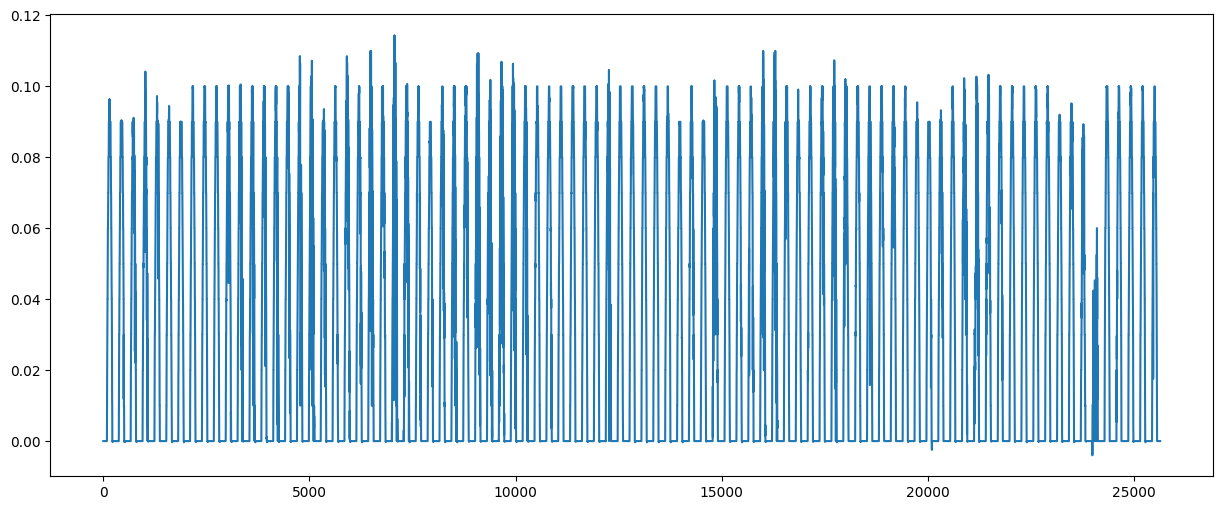

In [95]:
data['Active_Power'].plot(figsize=(15, 6))

<Axes: >

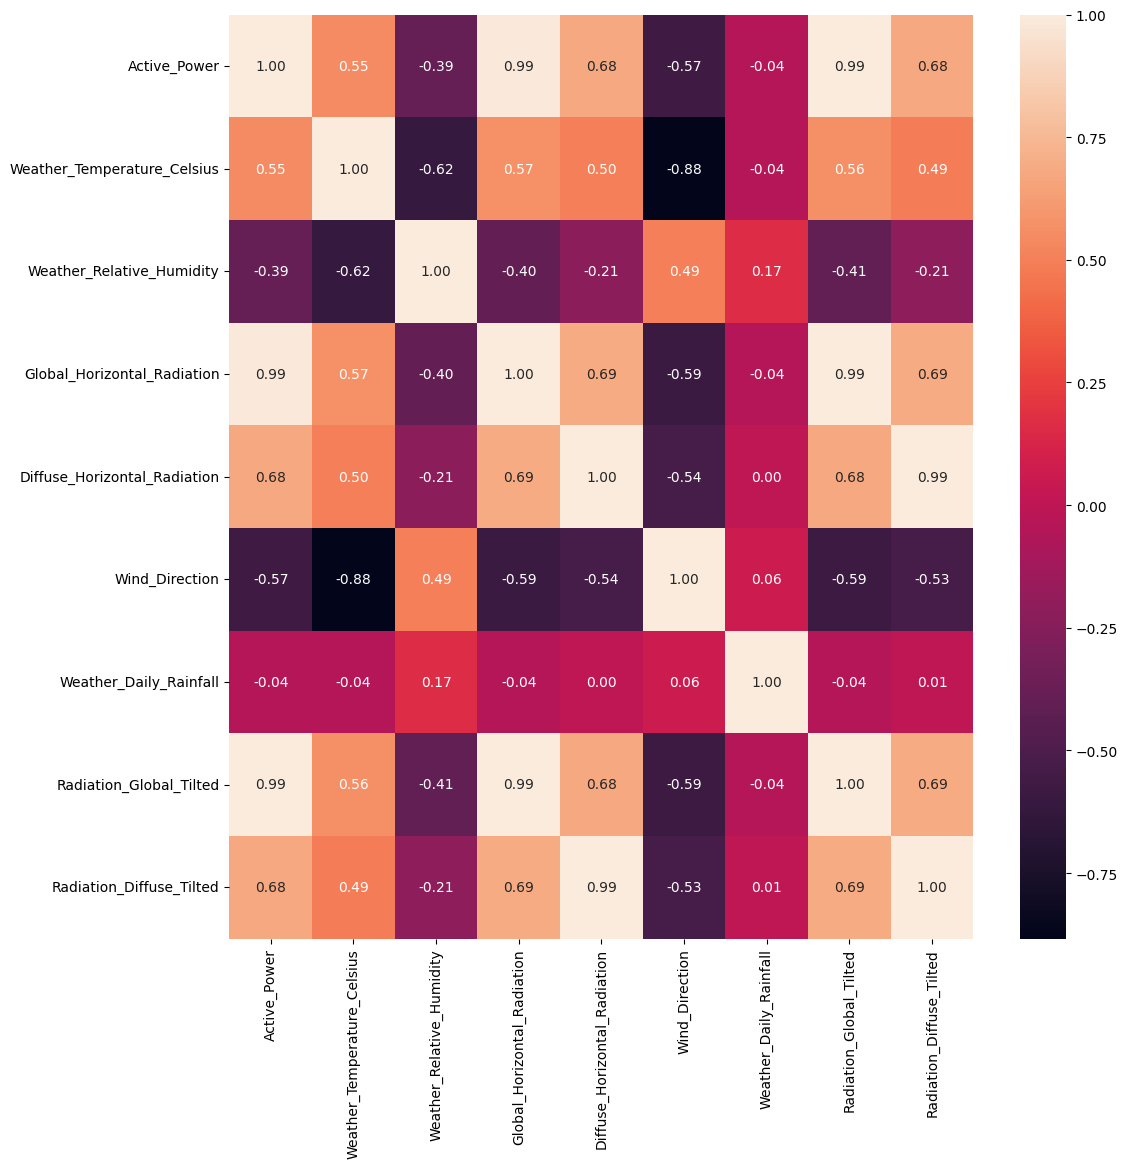

In [87]:
# 和value的相关性
import seaborn as sns
plt.figure(figsize=(12, 12))
data_corr = data.drop(['timestamp'], axis=1)
sns.heatmap(data_corr.corr(), annot=True, fmt=".2f")


In [88]:
data = data.drop(['timestamp'], axis=1)
for col in data.columns:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

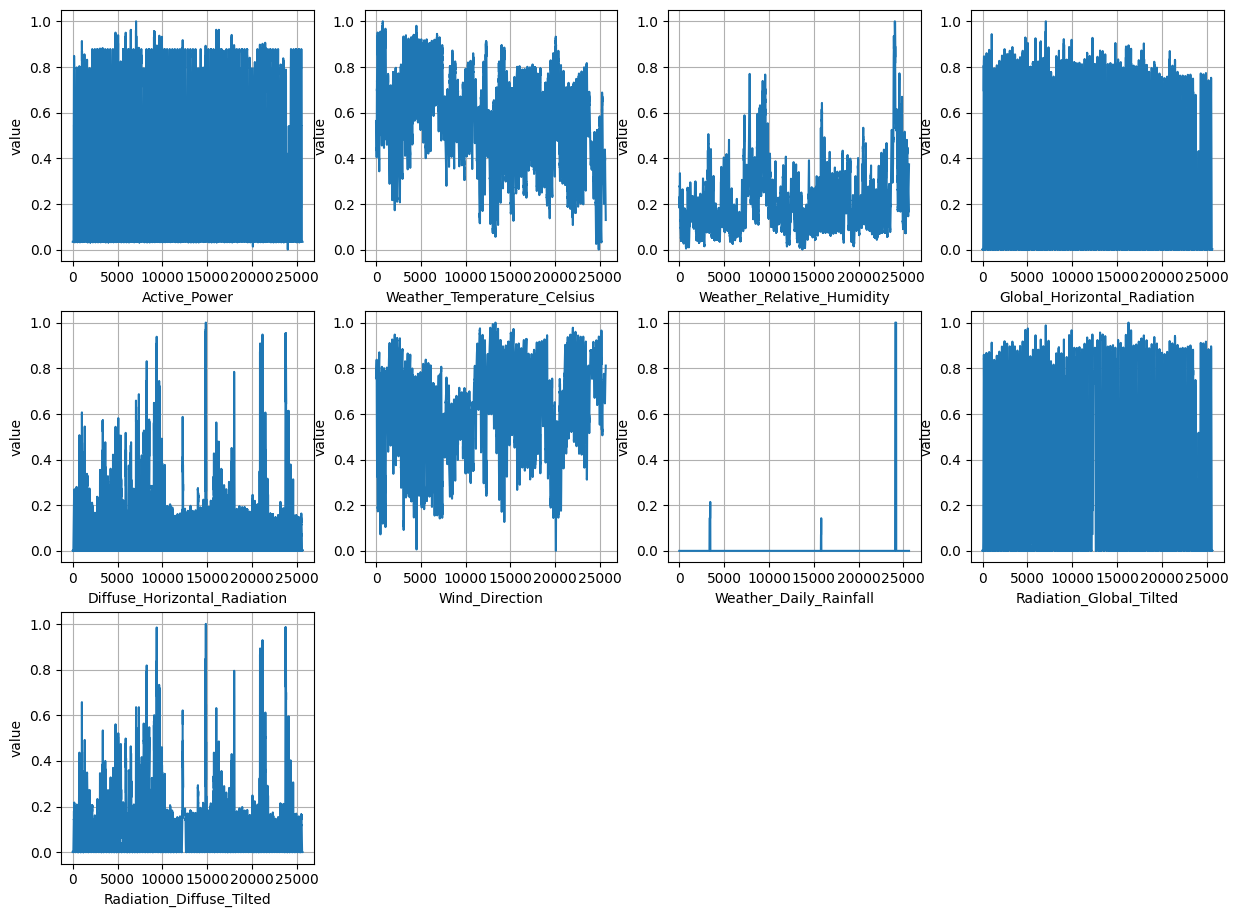

In [89]:
# plot 所有变量和value的趋势，单独作图
plt.figure(figsize=(15, 15))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    plt.plot(data[col])
    plt.xlabel(col)
    plt.ylabel('value')
    plt.grid(True)